# Future Work 

The next steps to improve Firelook will involve integrating 'Fire danger indices historical data from the Copernicus Emergency Management Service' into our frontend for the study area.
The fire danger metrics available are sourced from a comprehensive dataset established by the Copernicus Emergency Management Service to support the European Forest Fire Information System (EFFIS). This system encompasses fire danger indices derived from three distinct models developed in Canada, the United States, and Australia. Within this dataset, the fire danger indices are calculated based on historical weather forecast simulations obtained from the ECMWF ERA5 reanalysis. You can find the data in the next link [Fire danger indices historical data](https://cds.climate.copernicus.eu/cdsapp#!/dataset/cems-fire-historical-v1?tab=overview)

## The Case Event

We gathered various fire danger indices for October 8, 2023, covering the Colombian region, with the aim of comparing their outcomes with the active fires on the same day. Below, we present these indices spatially, along with an explanation of their significance and potential applications for wildfire mitigation and prevention.

In [15]:
import xarray as xr
ds = xr.open_dataset('/Users/mooveit-tati/Documents/Fire/geoappsys/ERA5_Data/fire_us_indexs.nc')
ds

<xarray.Dataset>
Dimensions:    (latitude: 65, longitude: 45)
Coordinates:
    time       datetime64[ns] ...
    surface    float64 ...
  * latitude   (latitude) float64 13.0 12.75 12.5 12.25 ... -2.5 -2.75 -3.0
  * longitude  (longitude) float64 282.0 282.2 282.5 282.8 ... 292.5 292.8 293.0
Data variables:
    buinfdr    (latitude, longitude) float32 ...
    ercnfdr    (latitude, longitude) float32 ...
    icnfdr     (latitude, longitude) float32 ...
    scnfdr     (latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2023-10-08T15:26 GRIB to CDM+CF via cfgrib-0.9.9...

In [16]:
variable1 = ds['buinfdr']
variable2 = ds['ercnfdr']
variable3 = ds['icnfdr']
variable4 = ds['scnfdr']
latitude = ds['latitude']
longitude = ds['longitude']

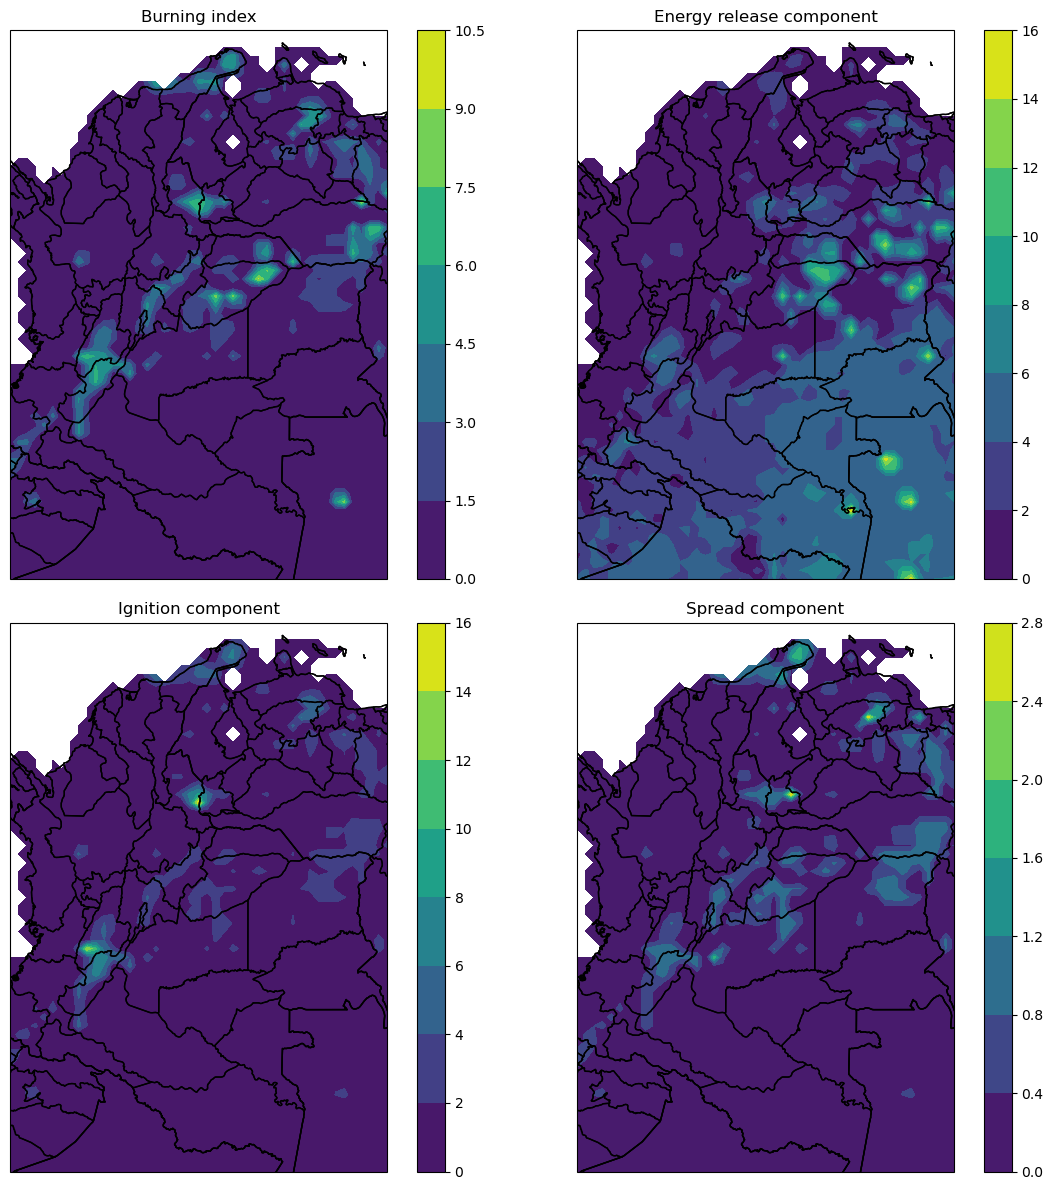

In [18]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cf

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12), subplot_kw={'projection': ccrs.PlateCarree()})


variables = [variable1, variable2, variable3, variable4]


titulos = ['Burning index', 'Energy release component', 'Ignition component', 'Spread component']


for i, ax in enumerate(axs.flatten()):
   
    im = ax.contourf(longitude, latitude, variables[i], transform=ccrs.PlateCarree(), cmap='viridis')

 
    ax.coastlines()
    ax.add_feature(cf.BORDERS)
    ax.add_feature(cf.STATES)

    
    cbar = plt.colorbar(im, ax=ax, orientation='vertical', pad=0.05)
    #cbar.set_label('Variable Units')


    ax.set_title(titulos[i])

plt.tight_layout()

plt.show()

* The Burning Index measures the difficulty of controlling a fire. It is derived from a combination of Spread component (how fast it will spread) and Energy release component (how much energy will be produced).

* The Energy release component is a number related to the available energy (British Thermal Unit) per unit area (square foot) within the flaming front at the head of a fire. Daily variations in Energy release component are due to changes in moisture content of the various fuels present, both live and dead.

*